In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets as ds
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = ds.load_iris()

In [3]:
df_iris = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])

In [4]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
dfT = df_iris.copy()
dfT['target'] = iris['target']

In [6]:
def set_tipo(codigo_tipo):
    if codigo_tipo == 0:
        return iris['target_names'][0]
    elif codigo_tipo == 1:
        return iris['target_names'][1]
    elif codigo_tipo == 2:
        return iris['target_names'][2]

In [7]:
dfT['target_name'] = dfT['target'].apply(set_tipo)

In [8]:
dfT.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
df_resultado = df_iris.copy()

In [10]:
df_resultado.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
tree_kwargs = {
    'criterion': 'entropy',
    'splitter': 'best',
    'min_samples_split': 2,

}

clf = DecisionTreeClassifier(**tree_kwargs)

In [12]:
model = clf.fit(X=df_resultado, y=dfT['target'])

In [13]:
df_resultado['target_prev'] = model.predict(df_iris)

In [14]:
df_resultado.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_prev
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df_resultado['target_name_prev'] = df_resultado['target_prev'].apply(set_tipo)

C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


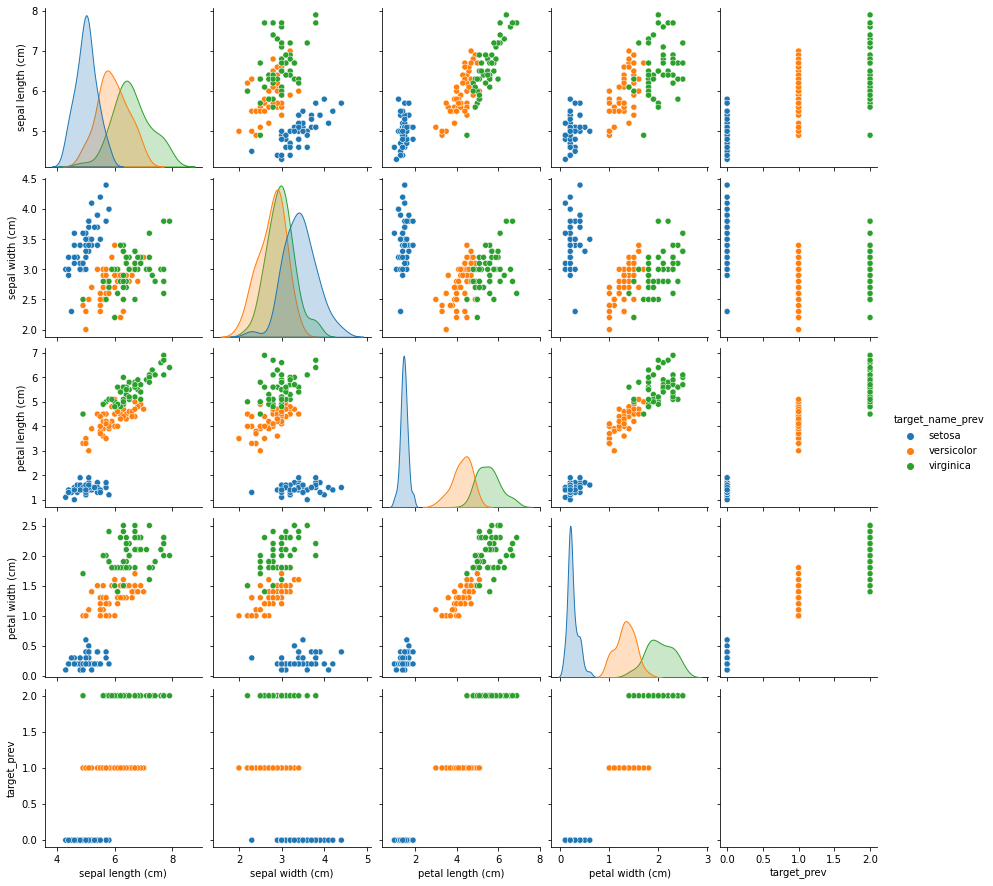

In [16]:
sns.pairplot(data=df_resultado, hue='target_name_prev')

C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


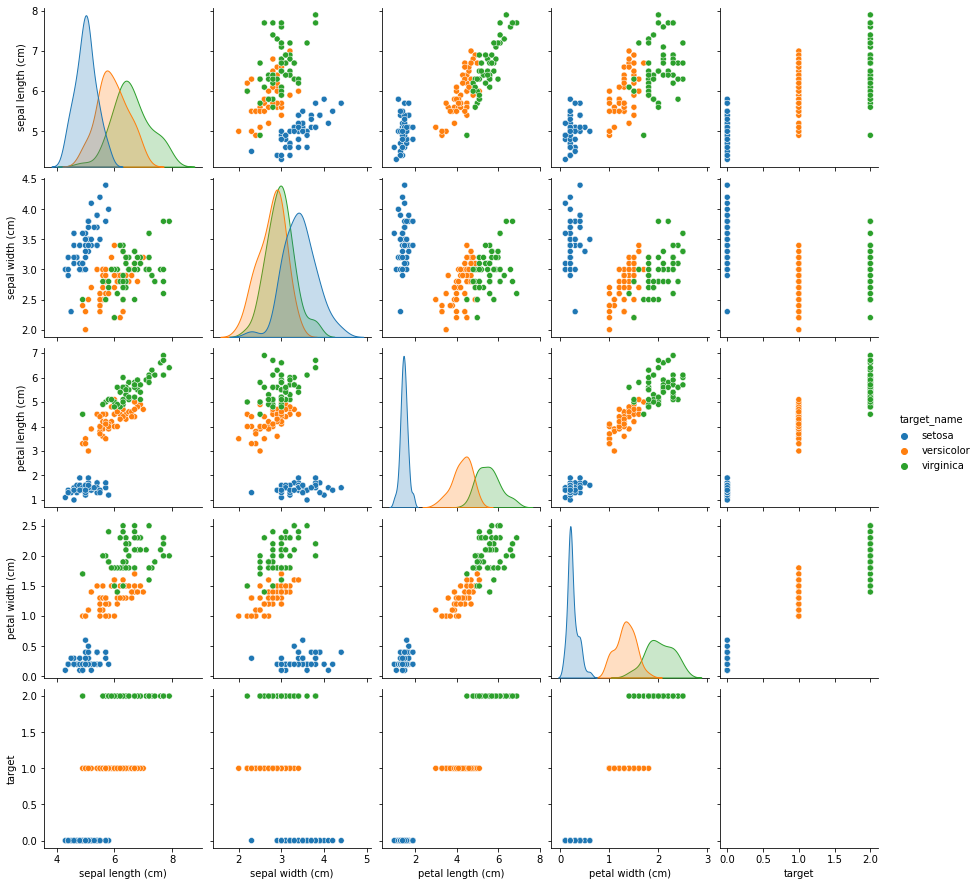

In [17]:
sns.pairplot(data=dfT, hue='target_name')

Text(0.5, 1.0, 'b) Rótulos previstos.')

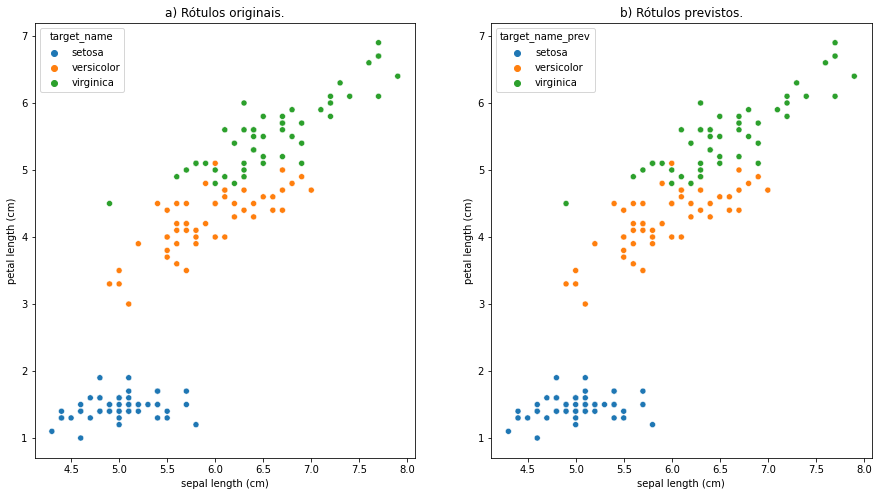

In [18]:
# Gráficos de distribuição dos dados originais e previstos
fig, axes = plt.subplots(1, 2, figsize=(15,8))
sns.scatterplot(x = dfT['sepal length (cm)'], y = dfT['petal length (cm)'], hue = dfT['target_name'], ax = axes[0])
sns.scatterplot(x = df_resultado['sepal length (cm)'], y = df_resultado['petal length (cm)'], hue = df_resultado['target_name_prev'], ax = axes[1])
axes[0].set_title('a) Rótulos originais.')
axes[1].set_title('b) Rótulos previstos.')

In [19]:
cm = confusion_matrix(dfT['target_name'], df_resultado['target_name_prev'])
df_cm = pd.DataFrame(cm, index=('Real = ' + pd.DataFrame(iris.target_names)[0]), 
    columns=('Prev = ' + pd.DataFrame(iris.target_names)[0]))
df_cm.head()

,Prev = setosa,Prev = versicolor,Prev = virginica
0,,,
Real = setosa,50,0,0
Real = versicolor,0,50,0
Real = virginica,0,0,50


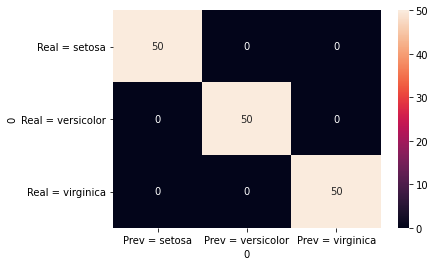

In [20]:
sns.heatmap(df_cm, annot=True)
plt.show()

In [22]:
accuracy_score(dfT['target_name'], df_resultado['target_name_prev'])

1.0

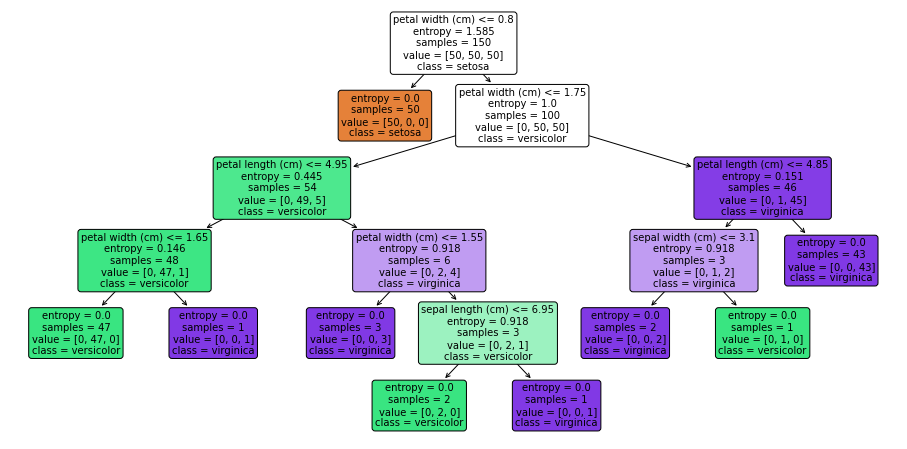

In [30]:
# Cria uma área de gráfico de tamanho específico
fig, ax = plt.subplots(figsize=(16, 8))
# Plota a árvore preenchida pela cor da classe que predomina no nó
arvore = plot_tree(model, feature_names=df_resultado.columns, class_names = iris['target_names'], fontsize=10, filled=True, rounded=True, ax=ax)